<a href="https://colab.research.google.com/github/Stepeech/DataMining/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%E2%84%9611_%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B2%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обучить модели машинного обучения для решения задачи классификации, используя следующие boosting-алгоритмы: CatBoost, Light GBM, XGBoost, AdaBoost. Сравнить их точность и быстродействие.

Датасет: https://www.kaggle.com/c/titanic/data

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
data = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [15]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
models = {
    'CatBoost': CatBoostClassifier(),
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

In [17]:
train_time = {}
acc = {}

In [18]:
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time[name] = end_time - start_time

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc[name] = accuracy

Learning rate set to 0.008895
0:	learn: 0.6879731	total: 47.9ms	remaining: 47.8s
1:	learn: 0.6821105	total: 49.3ms	remaining: 24.6s
2:	learn: 0.6764388	total: 50.7ms	remaining: 16.9s
3:	learn: 0.6713463	total: 52.6ms	remaining: 13.1s
4:	learn: 0.6663175	total: 54.1ms	remaining: 10.8s
5:	learn: 0.6616628	total: 55.1ms	remaining: 9.12s
6:	learn: 0.6565426	total: 56.4ms	remaining: 8.01s
7:	learn: 0.6510838	total: 57.9ms	remaining: 7.18s
8:	learn: 0.6482789	total: 58.8ms	remaining: 6.47s
9:	learn: 0.6435136	total: 59.7ms	remaining: 5.91s
10:	learn: 0.6383129	total: 61ms	remaining: 5.49s
11:	learn: 0.6327530	total: 62.3ms	remaining: 5.13s
12:	learn: 0.6275691	total: 63.5ms	remaining: 4.82s
13:	learn: 0.6250701	total: 64.3ms	remaining: 4.53s
14:	learn: 0.6205957	total: 65.8ms	remaining: 4.32s
15:	learn: 0.6172861	total: 66.6ms	remaining: 4.1s
16:	learn: 0.6137845	total: 67.6ms	remaining: 3.91s
17:	learn: 0.6092954	total: 68.8ms	remaining: 3.75s
18:	learn: 0.6048180	total: 70.1ms	remaining: 3

In [19]:
print("Точность обучения:")
for name, accuracy in acc.items():
    print(f"{name}: {accuracy:.4f}")

print("\nВремя обучения:")
for name, time_taken in train_time.items():
    print(f"{name}: {time_taken:.4f} секунд")

Точность обучения:
CatBoost: 0.8315
LightGBM: 0.7809
XGBoost: 0.7921
AdaBoost: 0.7921

Время обучения:
CatBoost: 1.6561 секунд
LightGBM: 0.1661 секунд
XGBoost: 0.0854 секунд
AdaBoost: 0.1159 секунд


Обучить модели машинного обучения для решения задачи регрессии, используя следующие boosting-алгоритмы: CatBoost, Light GBM, XGBoost, AdaBoost. Сравнить их точность и быстродействие.

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

In [5]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

In [13]:
data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=1)

In [14]:
n_pixels = data.shape[1]


X_train = train[:, :(n_pixels + 1) // 2]

y_train = train[:, n_pixels // 2:]


X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

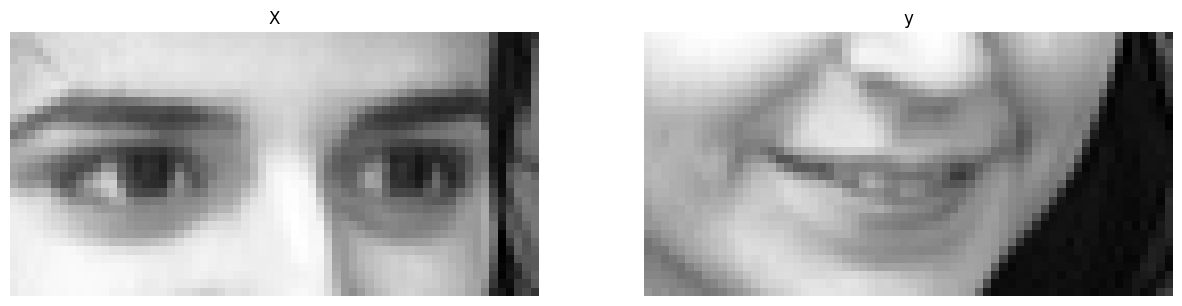

In [15]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx].reshape((32, 64)), cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx].reshape((32, 64)), cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

models = {
    'CatBoost': CatBoostRegressor(),
    'LightGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

In [17]:
train_time = {}
acc = {}

In [22]:
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time[name] = end_time - start_time

Learning rate set to 0.034197
0:	learn: 11.4486068	total: 569ms	remaining: 9m 28s
1:	learn: 11.3205363	total: 1.02s	remaining: 8m 29s
2:	learn: 11.1882375	total: 1.45s	remaining: 8m 2s
3:	learn: 11.0531220	total: 1.89s	remaining: 7m 50s
4:	learn: 10.9218861	total: 2.33s	remaining: 7m 44s
5:	learn: 10.7737239	total: 2.76s	remaining: 7m 38s
6:	learn: 10.6537053	total: 3.2s	remaining: 7m 33s
7:	learn: 10.5448701	total: 3.62s	remaining: 7m 29s
8:	learn: 10.4431296	total: 4.11s	remaining: 7m 32s
9:	learn: 10.3291000	total: 4.59s	remaining: 7m 34s
10:	learn: 10.2384345	total: 5.06s	remaining: 7m 35s
11:	learn: 10.1396208	total: 5.49s	remaining: 7m 32s
12:	learn: 10.0421485	total: 5.96s	remaining: 7m 32s
13:	learn: 9.9496507	total: 6.4s	remaining: 7m 30s
14:	learn: 9.8610695	total: 6.96s	remaining: 7m 37s
15:	learn: 9.7624944	total: 7.75s	remaining: 7m 56s
16:	learn: 9.6623869	total: 8.54s	remaining: 8m 13s
17:	learn: 9.5637132	total: 9.35s	remaining: 8m 30s
18:	learn: 9.4833223	total: 10.1s	

In [23]:
from sklearn.metrics import mean_squared_error
preds = []
tests = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    preds.append(y_pred)
    tests.append(X_test)
    mse = mean_squared_error(y_test, y_pred)
    acc[name] = mse

In [24]:
print("Точность обучения (MSE):")
for name, accuracy in acc.items():
    print(f"{name}: {accuracy:.4f}")

print("\nВремя обучения:")
for name, time_taken in train_time.items():
    print(f"{name}: {time_taken:.4f} секунд")

Точность обучения (MSE):
CatBoost: 49.2997
LightGBM: 64.2729
XGBoost: 86.8242
AdaBoost: 62.0381

Время обучения:
CatBoost: 528.3810 секунд
LightGBM: 5.3013 секунд
XGBoost: 25.9606 секунд
AdaBoost: 11.0773 секунд
